In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\tommc\\Downloads')

# 1. Introduction

In [ ]:
### This notebook contians all of the information needed to find the listing price of an airbnb in New York City. 
### The data was taken in 2018

# 2. Data / Features

In [ ]:
### The data was broken up into 2 diffrent csv files

In [3]:
data = pd.read_csv('listings (1).csv')

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


In [5]:
df = pd.read_csv('listings (2).csv.gz',compression='gzip')

In [6]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20201210194816,2020-12-11,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.36
1,3831,https://www.airbnb.com/rooms/3831,20201210194816,2020-12-11,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,9.0,10.0,10.0,NaN,f,1,1,0,0,4.97
2,5121,https://www.airbnb.com/rooms/5121,20201210194816,2020-12-11,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.36
3,5178,https://www.airbnb.com/rooms/5178,20201210194816,2020-12-11,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.36
4,5203,https://www.airbnb.com/rooms/5203,20201210194816,2020-12-11,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.86


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 16 columns):
id                                36923 non-null int64
name                              36910 non-null object
host_id                           36923 non-null int64
host_name                         36914 non-null object
neighbourhood_group               36923 non-null object
neighbourhood                     36923 non-null object
latitude                          36923 non-null float64
longitude                         36923 non-null float64
room_type                         36923 non-null object
price                             36923 non-null int64
minimum_nights                    36923 non-null int64
number_of_reviews                 36923 non-null int64
last_review                       27539 non-null object
reviews_per_month                 27539 non-null float64
calculated_host_listings_count    36923 non-null int64
availability_365                  36923 non-null int64

In [8]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
id                                              36923 non-null int64
listing_url                                     36923 non-null object
scrape_id                                       36923 non-null int64
last_scraped                                    36923 non-null object
name                                            36910 non-null object
description                                     35829 non-null object
neighborhood_overview                           23446 non-null object
picture_url                                     36923 non-null object
host_id                                         36923 non-null int64
host_url                                        36923 non-null object
host_name                                       36914 non-null object
host_since                                      36914 non-null object
host_location                                   36813 

In [ ]:
### Taking a look at a few of the values for diffrent features and dropping features that don't matter

In [10]:
data.availability_365.value_counts()

0      14843
365     3075
364     1285
180      722
90       662
       ...  
201        5
113        5
278        5
217        5
198        5
Name: availability_365, Length: 366, dtype: int64

In [11]:
data = data.drop('last_review',axis=1)

In [12]:
data.number_of_reviews.value_counts()

0      9384
1      4100
2      2533
3      1858
4      1443
       ... 
338       1
293       1
357       1
421       1
447       1
Name: number_of_reviews, Length: 392, dtype: int64

In [ ]:
### I saw that the amount of listings with null values for reviews per month was equal to 
### the amount of listings with zero reviews

In [13]:
data[data['reviews_per_month']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [14]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [15]:
data.reviews_per_month.value_counts()

0.00    9384
0.02    1126
0.03     861
0.05     691
0.04     687
        ... 
7.01       1
5.09       1
8.34       1
5.54       1
7.27       1
Name: reviews_per_month, Length: 744, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 15 columns):
id                                36923 non-null int64
name                              36910 non-null object
host_id                           36923 non-null int64
host_name                         36914 non-null object
neighbourhood_group               36923 non-null object
neighbourhood                     36923 non-null object
latitude                          36923 non-null float64
longitude                         36923 non-null float64
room_type                         36923 non-null object
price                             36923 non-null int64
minimum_nights                    36923 non-null int64
number_of_reviews                 36923 non-null int64
reviews_per_month                 36923 non-null float64
calculated_host_listings_count    36923 non-null int64
availability_365                  36923 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 4

In [17]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,0.86,1,0


In [ ]:
### Dropping 'name' and 'host_name' because they have no value in the model nor any value to
### merge the two datasets on

In [18]:
data = data.drop('name',axis=1)

In [19]:
data = data.drop('host_name',axis=1)

In [20]:
data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,0.36,2,365
1,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,4.97,1,307
2,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,0.36,1,365
3,5178,8967,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,3.36,1,0
4,5203,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,0.86,1,0


In [ ]:
### Looking at how many listings with diffrent feature show up in each neighbourhood or group

In [21]:
data.groupby(by='neighbourhood_group')['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         558
                     Entire home/apt      348
                     Shared room           30
                     Hotel room             1
Brooklyn             Entire home/apt     7202
                     Private room        7001
                     Shared room          219
                     Hotel room            17
Manhattan            Entire home/apt    10135
                     Private room        5948
                     Shared room          289
                     Hotel room           270
Queens               Private room        2841
                     Entire home/apt     1641
                     Shared room          138
                     Hotel room             9
Staten Island        Entire home/apt      144
                     Private room         130
                     Shared room            2
Name: room_type, dtype: int64

In [22]:
data.groupby(by='neighbourhood')['room_type'].value_counts()

neighbourhood  room_type      
Allerton       Private room        17
               Entire home/apt     14
Arden Heights  Entire home/apt      2
               Private room         1
Arrochar       Private room        10
                                 ... 
Woodlawn       Private room         3
Woodrow        Entire home/apt      1
Woodside       Private room       288
               Entire home/apt     58
               Shared room          4
Name: room_type, Length: 546, dtype: int64

In [23]:
data.groupby(by='neighbourhood_group')['price'].value_counts()

neighbourhood_group  price
Bronx                50       51
                     45       42
                     40       41
                     60       39
                     65       35
                              ..
Staten Island        425       1
                     431       1
                     650       1
                     850       1
                     1200      1
Name: price, Length: 1769, dtype: int64

In [ ]:
### Merging the two datasets on the id in each dataset

In [24]:
df = df[['id','accommodates']]
data = pd.merge(data,df,on='id')

In [25]:
data.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'accommodates'],
      dtype='object')

In [26]:
data.groupby(by='neighbourhood_group')['accommodates'].value_counts()

neighbourhood_group  accommodates
Bronx                2               418
                     1               198
                     4               125
                     3                81
                     6                33
                                    ... 
Staten Island        12                3
                     10                2
                     11                2
                     7                 1
                     16                1
Name: accommodates, Length: 77, dtype: int64

In [27]:
data.groupby(by='neighbourhood')['accommodates'].value_counts()

neighbourhood  accommodates
Allerton       2               13
               3                6
               1                3
               4                2
               7                2
                               ..
Woodside       3                9
               6                5
               8                4
               7                3
               9                1
Name: accommodates, Length: 1455, dtype: int64

In [28]:
data.groupby(by='accommodates')['price'].value_counts()

accommodates  price
0             0          9
1             50       423
              45       325
              40       299
              60       269
                      ... 
16            2857       1
              2900       1
              3500       1
              4000       1
              5250       1
Name: price, Length: 2970, dtype: int64

In [ ]:
### creating dummy variables for the bourghs and dropping the meighbourhood feature because
### there were not enough listings in each neighourhood to be helpfull in the models

In [29]:
dummies_group = pd.get_dummies(data['neighbourhood_group'])

In [30]:
data = data.drop('neighbourhood',axis=1)

In [31]:
data = pd.concat([data.drop('neighbourhood_group',axis=1),dummies_group],axis=1)

In [32]:
data.head()

,id,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2595,2845,40.75362,-73.98377,Entire home/apt,175,30,48,0.36,2,365,2,0,0,1,0,0
1,3831,4869,40.68514,-73.95976,Entire home/apt,74,1,375,4.97,1,307,3,0,1,0,0,0
2,5121,7356,40.68688,-73.95596,Private room,60,30,50,0.36,1,365,2,0,1,0,0,0
3,5178,8967,40.76468,-73.98315,Private room,65,2,474,3.36,1,0,2,0,0,1,0,0
4,5203,7490,40.80178,-73.96723,Private room,75,2,118,0.86,1,0,1,0,0,1,0,0


In [34]:
data.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'accommodates',
       'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype='object')

In [ ]:
### Dropping all other features that will not be taken into account by the models

In [35]:
data = data.drop('id',axis=1)

In [36]:
data = data.drop(['host_id','latitude','longitude','availability_365'],axis=1)

In [37]:
data = data.drop(['room_type','calculated_host_listings_count'],axis=1)

In [38]:
data = data.drop(['number_of_reviews','reviews_per_month'],axis=1)

In [39]:
data = data.drop('minimum_nights',axis=1)

In [40]:
data.columns

Index(['price', 'accommodates', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island'],
      dtype='object')

# 3. Modeling

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [43]:
import sklearn.metrics

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 36922
Data columns (total 7 columns):
price            36923 non-null int64
accommodates     36923 non-null int64
Bronx            36923 non-null uint8
Brooklyn         36923 non-null uint8
Manhattan        36923 non-null uint8
Queens           36923 non-null uint8
Staten Island    36923 non-null uint8
dtypes: int64(2), uint8(5)
memory usage: 1.0 MB


In [ ]:
### Sclaing the data before splitting, trainning, and testing the models

In [45]:
X = data.drop('price',axis=1)
y= data.price
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=1)

In [47]:
print(X_train)
print(y_train)

[[-0.976469    6.19722112 -0.80136758 -0.90585373 -0.3786018  -0.08678313]
 [ 2.80778029  6.19722112 -0.80136758 -0.90585373 -0.3786018  -0.08678313]
 [ 1.72656621 -0.16136265 -0.80136758  1.10393099 -0.3786018  -0.08678313]
 ...
 [ 0.64535213 -0.16136265 -0.80136758  1.10393099 -0.3786018  -0.08678313]
 [-0.43586196 -0.16136265  1.2478668  -0.90585373 -0.3786018  -0.08678313]
 [-0.43586196 -0.16136265 -0.80136758  1.10393099 -0.3786018  -0.08678313]]
27769     45
33340     99
28049    339
32804    117
18312     76
        ... 
7813     150
32511    159
5192     150
12172    112
33003    150
Name: price, Length: 27692, dtype: int64


In [48]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [49]:
y_pred = model.predict(X_test)

In [50]:
explained_variance_score(y_test,y_pred)

0.09432196250324709

In [51]:
mean_absolute_error(y_test,y_pred)

77.26153900351412

In [52]:
r2_score(y_test,y_pred)

0.09431338459819105

In [53]:
df_model = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'],)
df_model.sort_values(by='Coefficient',ascending=False)

,Coefficient
Manhattan,1.784496e+13
Brooklyn,1.750143e+13
Queens,1.187607e+13
Bronx,5.640332e+12
Staten Island,3.089170e+12
accommodates,7.850628e+01


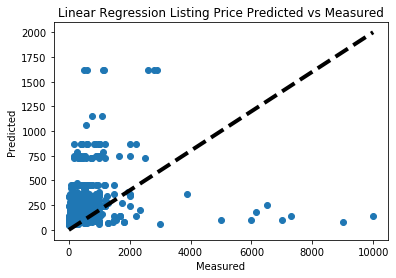

In [110]:
plt.scatter(y_test,y_pred)
plt.plot([y.min(),y.max()],[y.min(),2000],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Listing Price Predicted vs Measured')
plt.show()

In [ ]:
### Creating a Random Forest Model selecting the number of tree in the forst
### and specifying that the forest should work to minimize mean absolute error

In [106]:
RFmodel = RandomForestRegressor(n_estimators = 100,random_state=1,criterion='mae')

In [107]:
RFmodel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [56]:
y_predRF = RFmodel.predict(X_test)

In [57]:
explained_variance_score(y_test,y_predRF)

0.11141283921146394

In [58]:
mean_absolute_error(y_test,y_predRF)

74.9500338762465

In [59]:
r2_score(y_test,y_predRF)

0.1114038760009406

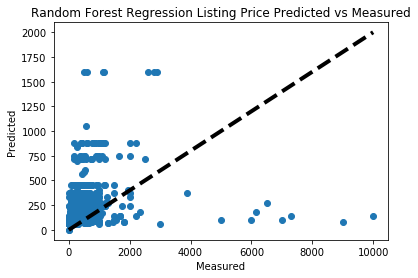

In [111]:
plt.scatter(y_test,y_predRF)
plt.plot([y.min(),y.max()],[y.min(),2000],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Listing Price Predicted vs Measured')
plt.show()

In [60]:
important_features = pd.Series(data=RFmodel.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

In [61]:
important_features

accommodates     0.773402
Manhattan        0.207757
Brooklyn         0.008583
Bronx            0.006068
Queens           0.002873
Staten Island    0.001316
dtype: float64

In [62]:
data['price'].describe()

count    36923.000000
mean       145.921187
std        268.388200
min          0.000000
25%         61.000000
50%        100.000000
75%        159.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
### Using a histagram to find how many bins I could break the data up into
### and what value of accommodates to use as a break point

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256A296DC08>]],
      dtype=object)

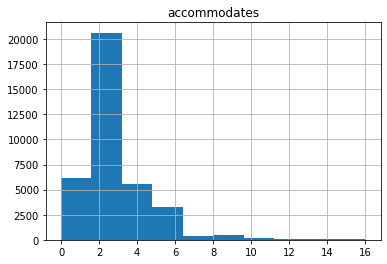

In [63]:
data.hist(column='accommodates',bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000256A25BF208>]],
      dtype=object)

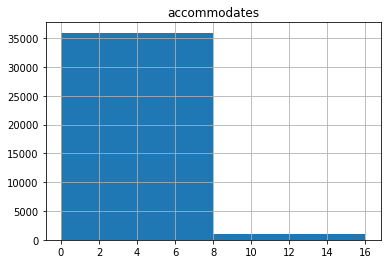

In [105]:
data.hist(column='accommodates',bins=2)

In [ ]:
### Breaking the dataset into listings that can accommodate more than 7 people and 
### listing that accomodate 7 or less

In [64]:
large = data[data['accommodates']>7]

In [65]:
large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 34 to 36922
Data columns (total 7 columns):
price            970 non-null int64
accommodates     970 non-null int64
Bronx            970 non-null uint8
Brooklyn         970 non-null uint8
Manhattan        970 non-null uint8
Queens           970 non-null uint8
Staten Island    970 non-null uint8
dtypes: int64(2), uint8(5)
memory usage: 27.5 KB


In [66]:
XL = large.drop('price',axis=1)

In [67]:
yL = large.price

In [68]:
large_scaler = StandardScaler().fit(XL)

In [69]:
large_scaled = large_scaler.transform(XL)

In [115]:
X_trainL,X_testL,y_trainL,y_testL = train_test_split(XL,yL,test_size=.25, random_state=1)

In [71]:
LargeRF = RandomForestRegressor(n_estimators=100,random_state=1,criterion='mae')

In [72]:
LargeRF.fit(X_trainL,y_trainL)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [73]:
yL_pred = LargeRF.predict(X_testL)

In [116]:
explained_variance_score(y_testL,yL_pred)

0.1976332814849754

In [117]:
mean_absolute_error(y_testL,yL_pred)

284.5747736625515

In [118]:
r2_score(y_testL,yL_pred)

0.15316297547510416

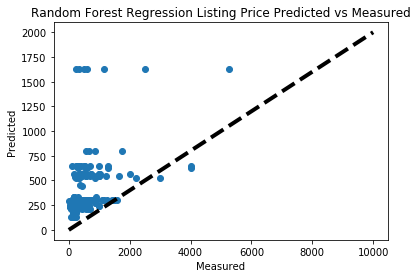

In [121]:
plt.scatter(y_testL,yL_pred)
plt.plot([y.min(),y.max()],[y.min(),2000],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Listing Price Predicted vs Measured')
plt.show()

In [77]:
large['price'].describe()

count     970.000000
mean      472.267010
std       548.155033
min        10.000000
25%       185.000000
50%       300.000000
75%       538.250000
max      7500.000000
Name: price, dtype: float64

In [78]:
small = data[data['accommodates']<=7]

In [79]:
small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35953 entries, 0 to 36921
Data columns (total 7 columns):
price            35953 non-null int64
accommodates     35953 non-null int64
Bronx            35953 non-null uint8
Brooklyn         35953 non-null uint8
Manhattan        35953 non-null uint8
Queens           35953 non-null uint8
Staten Island    35953 non-null uint8
dtypes: int64(2), uint8(5)
memory usage: 1018.2 KB


In [80]:
XS = small.drop('price',axis=1)
ys = small.price

In [81]:
small_scaler = StandardScaler().fit(XS)

In [82]:
small_scaled = small_scaler.transform(XS)

In [122]:
X_trainS,X_testS,y_trainS,y_testS = train_test_split(XS,ys,test_size=.25, random_state=1)

In [84]:
smallRF = RandomForestRegressor(n_estimators=100,random_state=1,criterion='mae')

In [85]:
smallRF.fit(X_trainS,y_trainS)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [123]:
ys_pred = smallRF.predict(X_testS)

In [124]:
explained_variance_score(y_testS,ys_pred)

0.058157139225389565

In [125]:
mean_absolute_error(y_testS,ys_pred)

62.7287707197686

In [126]:
r2_score(y_testS,ys_pred)

0.044151667371605585

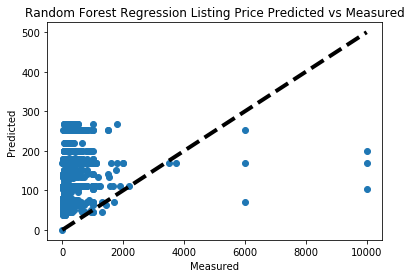

In [129]:
plt.scatter(y_testS,ys_pred)
plt.plot([y.min(),y.max()],[y.min(),500],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Listing Price Predicted vs Measured')
plt.show()

In [90]:
small['price'].describe()

count    35953.000000
mean       137.116485
std        250.850848
min          0.000000
25%         60.000000
50%         99.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64

# 4. Results

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=1)

In [ ]:
### Using Gridsearch to select the best hyperparamaters for the model

In [92]:
from sklearn.model_selection import GridSearchCV

In [144]:
max_depth = [None,5,10,20]
min_sample_leaf = [1,5,50]

In [145]:
param_grid = {'max_depth': max_depth,'min_samples_leaf': min_sample_leaf}

In [154]:
RFmodel3 = RandomForestRegressor(n_estimators=100,random_state=1)
RFmodel_cv = GridSearchCV(RFmodel3,param_grid,cv=5)

In [155]:
RFmodel_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 5, 10, 20],
     

In [156]:
print("Best Score:" + str(RFmodel_cv.best_score_))
print("Best Parameters: " + str(RFmodel_cv.best_params_))

Best Score:0.12633477713567792
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5}


In [157]:
RFfinal = RandomForestRegressor(n_estimators=1000,max_depth=5,min_samples_leaf=5)

In [158]:
RFfinal.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [159]:
y_pred = RFfinal.predict(X_test)

In [160]:
explained_variance_score(y_test,y_pred)

0.11148151336177303

In [161]:
mean_absolute_error(y_test,y_pred)

75.01727804085773

In [162]:
important_features = pd.Series(data=RFfinal.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

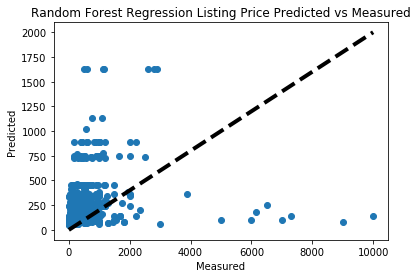

In [167]:
plt.scatter(y_test,y_pred)
plt.plot([y.min(),y.max()],[y.min(),2000],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Listing Price Predicted vs Measured')
plt.show()

In [164]:
important_features

accommodates     0.772319
Manhattan        0.219372
Brooklyn         0.005016
Queens           0.001666
Bronx            0.001522
Staten Island    0.000106
dtype: float64